# Recommender System


>A recommender system is a data science application that is used to predict or offer products to customers based on their past purchase or browsing history.

>It is based on the similarity based on the entities or users that previously rated those entities.

>The idea is that similar types of users are likely to have similar ratings for a set of entities.

>Basically, a recommendation engine filters the data using different algorithms and recommends the most relevant items to users.

>It first studies the past behaviour of a customer and based on that recommends products which he might buy.

### Collaborative Filtering Recommender System

>In the collaborative filtering recommender system, the behaviour of a group of users is used to make recommendations to other users.

>In this case, the system don’t have any knowledge about the product.

>Collaborative filtering approach build a model from a user’s past behaviour (items previously purchased or selected and/or numerical ratings given to those items) as well as similar decisions made by other users.

>This model is then used to predict items (or ratings for items) that the user may have an interest in.

>It recommends based on the user’s rating in the past.

>These systems try to predict the user’s rating or preferences based on past rating or preferences of other users.

>These filters do not require item metadata to make predictions.

### Content-based Filtering Recommender System 

>Content-based filtering methods are based on a description of the item and a profile of the user’s preferences.

>These methods are best suited to situations where there is known data on an item (name, location, description, etc.), but not n the user.

>In content based filtering recommender system, the similarity between different products is calculated on the basis of the attributes of the products.

>The system uses the knowledge of each product to recommend a new product.

>Content-based filtering approaches utilize a series of discrete characteristics of an item in order to recommend additional items with similar properties.

>For example, in a content based movie recommender system, the similarities between the movies is calculated on the basis of genres, the actors and the director.

>The general idea behind these recommender systems is that if a person liked a particular item, then he will also like an item similar to it.

>Content-based recommenders treat recommendation as a user-specific classification problem and learn a classifier for the user's likes and dislikes based on product features.

>The diagram below demonstrates content-based filtering recommender systems.


<mark> Importing Libraries <mark>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

<mark> Loading Datasets <mark> 

#### Datasets are downloaded from (https://www.kaggle.com/ayushimishra2809/movielens-dataset)

In [5]:
movies = pd.read_csv('movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [6]:
ratings = pd.read_csv('ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


#### Merging movies and ratings dataset

In [7]:
data = pd.merge(ratings, movies, on = 'movieId')
data

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama
...,...,...,...,...,...,...
105334,668,140098,2.5,1450415424,Runoff (2015),Drama
105335,668,140816,2.5,1443288791,Tangerine (2015),Comedy|Drama
105336,668,141472,2.5,1442679119,The 50 Year Argument (2014),(no genres listed)
105337,668,142488,4.0,1451535844,Spotlight (2015),Thriller


In [9]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Being Human (1993)                   5.0
Three Ages (1923)                    5.0
The Liberator (2013)                 5.0
October Baby (2011)                  5.0
Resident Evil: Retribution (2012)    5.0
Name: rating, dtype: float64

<mark> The movies have now been sorted according to the ascending order of their ratings.<mark>

<mark> However, there is a problem. A movie can make it to the top of the above list even if only a single user has given it five stars. Therefore, the above statistics can be misleading. Normally, a movie which is really a good one gets a higher rating by a large number of users, there fore now let us calculate the no. of ratings.<mark>

In [20]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: rating, dtype: int64

In [12]:
no_of_ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
no_of_ratings.head()

,rating
title,
'71 (2014),3.500
'Hellboy': The Seeds of Creation (2004),3.000
'Round Midnight (1986),2.500
'Til There Was You (1997),4.000
"'burbs, The (1989)",3.125


<mark>Now, we can see some great movies at the top. The above list supports our point that good movies normally receive higher ratings. Now we know that both the average rating per movie and the number of ratings per movie are important attributes.

<mark>So, let's create a new dataframe that contains both of these attributes.<mark>

In [14]:
no_of_ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
no_of_ratings.head()

,rating,num of ratings
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


#### Visualization

In [27]:
df1 = data.groupby(['title'])[['rating']].sum()
high_rated = df1.nlargest(20,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


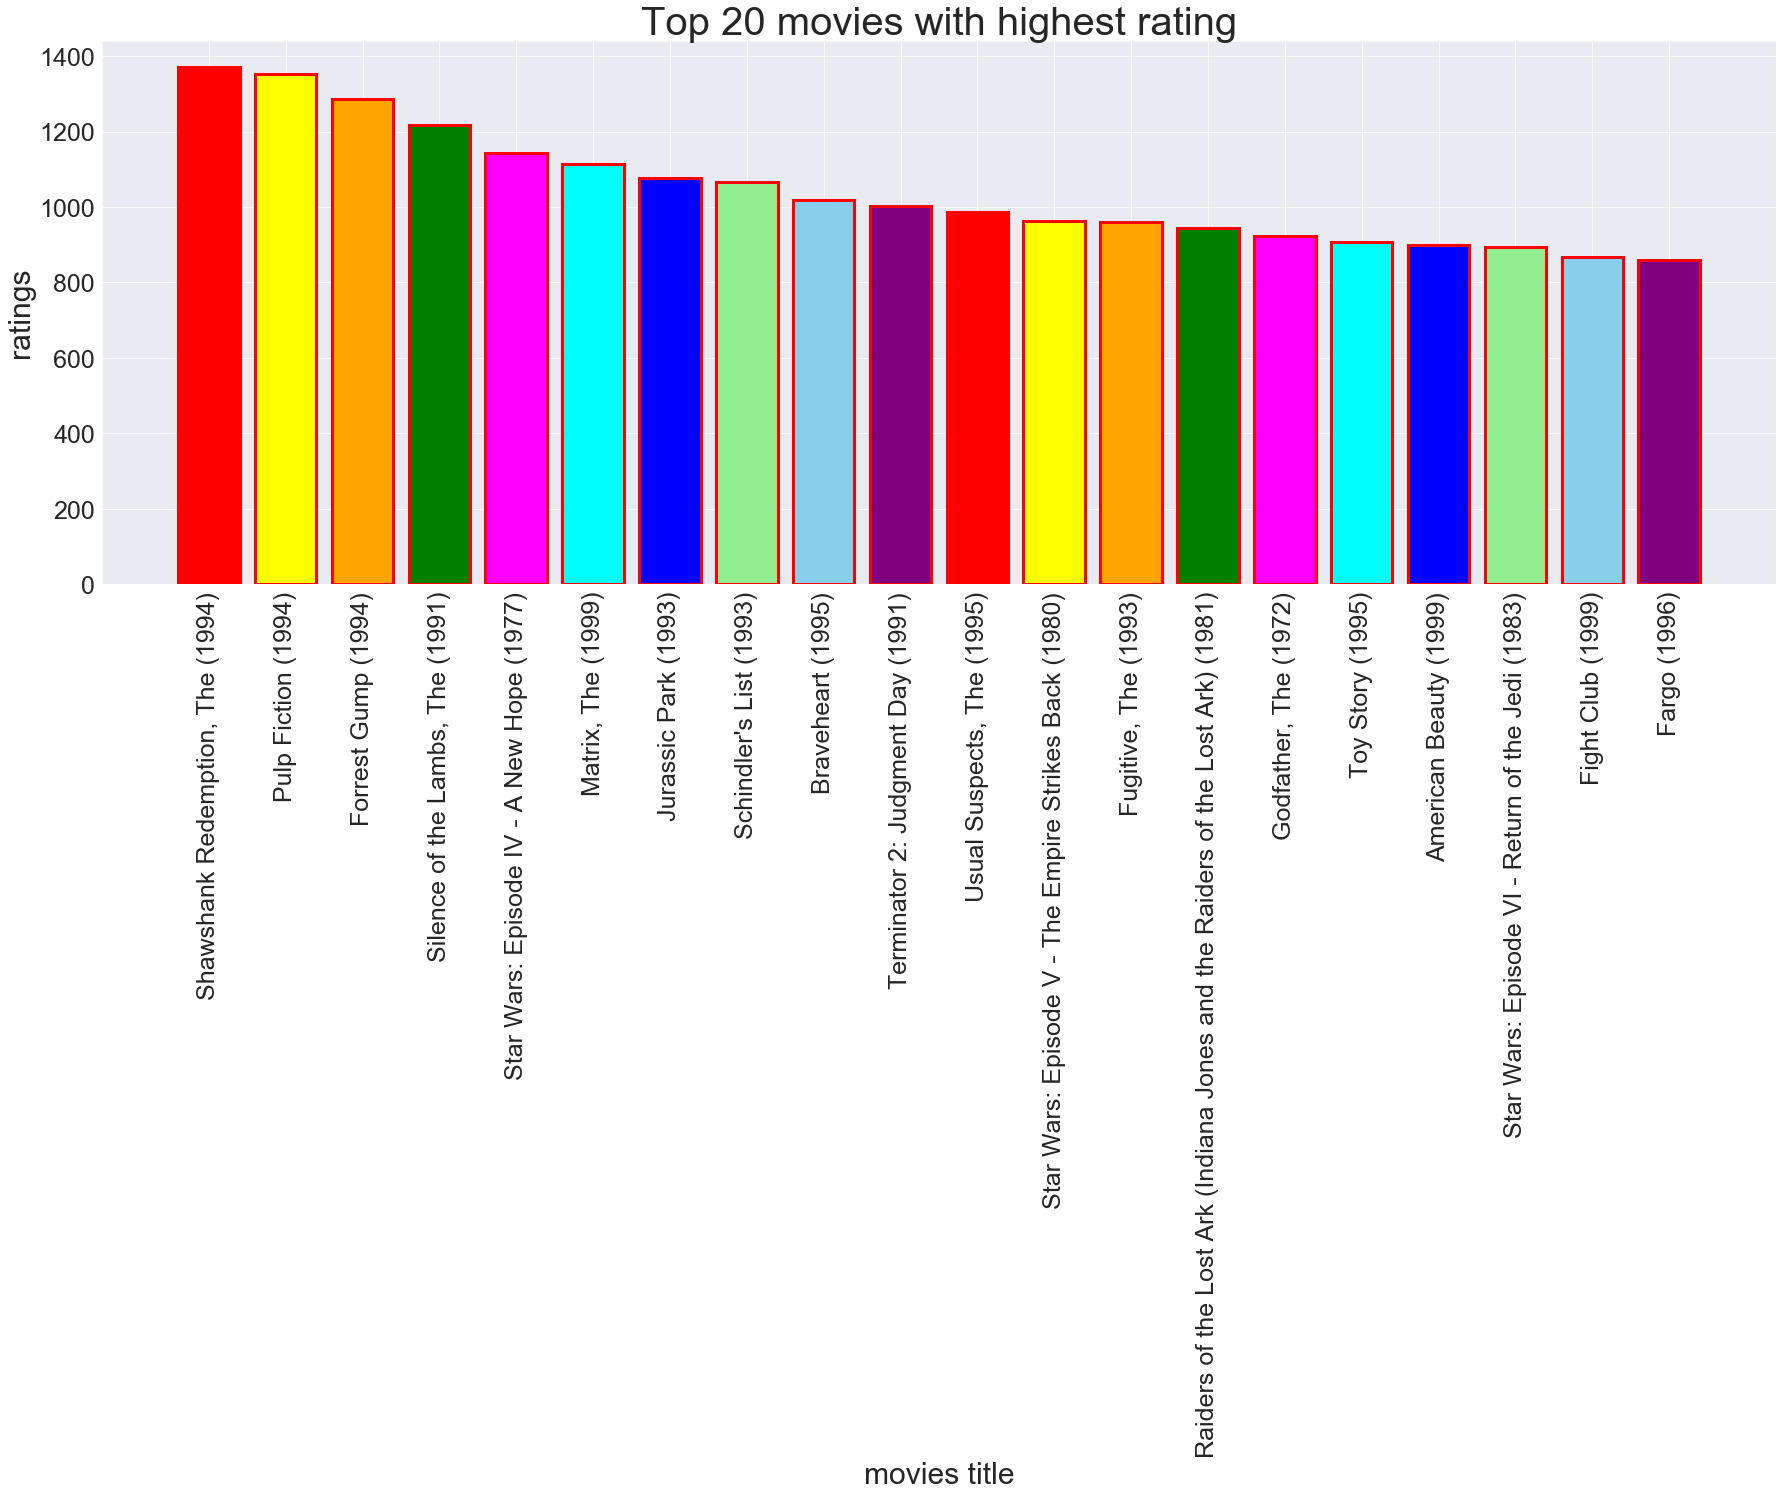

In [28]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='red',color=colors)
plt.show()

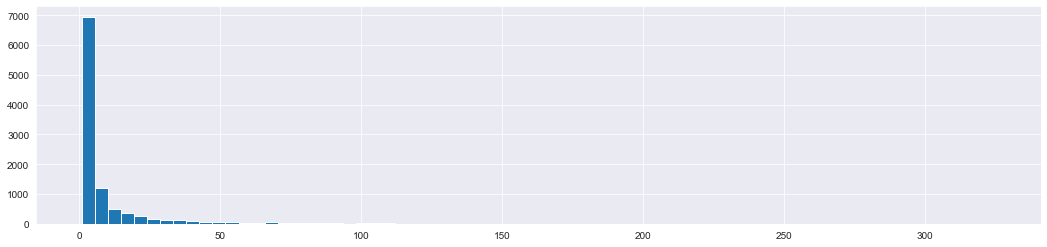

In [36]:
plt.figure(figsize=(18,4))
no_of_ratings['num of ratings'].hist(bins=70)
plt.show()

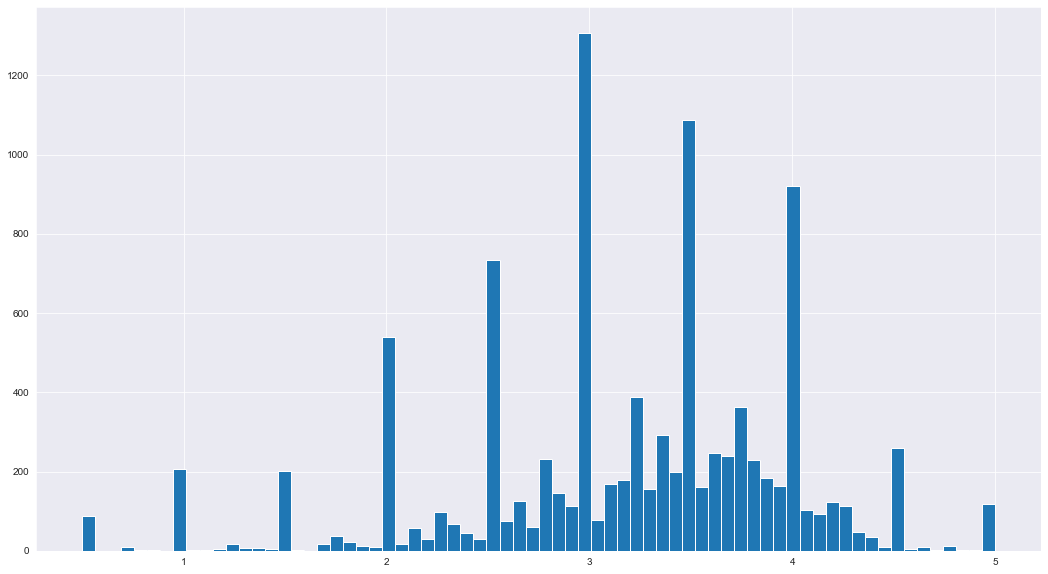

In [40]:
plt.figure(figsize=(18,10))
no_of_ratings['rating'].hist(bins=70)

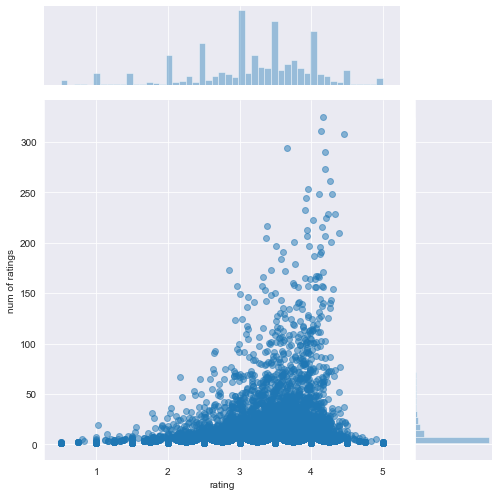

In [50]:
sns.jointplot(x='rating', y='num of ratings', data=no_of_ratings, height=7, ratio=4, alpha=0.5)

>We will use the correlation between the ratings of a movie as the similarity metric.

>To find the correlation between the ratings of the movie, we need to create a matrix where each column is a movie name and each row contains the rating assigned by a specific user to that movie.

>This matrix will have a lot of null values since every movie is not rated by every user.

>We will create the matrix of movie titles and corresponding user ratings. 

In [55]:
matrix = data.pivot_table(index='userId', columns='title', values='rating')
matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN


In [56]:
no_of_ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Pulp Fiction (1994),4.160000,325
Forrest Gump (1994),4.138264,311
"Shawshank Redemption, The (1994)",4.454545,308
Jurassic Park (1993),3.659864,294
"Silence of the Lambs, The (1991)",4.194828,290
Star Wars: Episode IV - A New Hope (1977),4.188645,273
"Matrix, The (1999)",4.264368,261
Terminator 2: Judgment Day (1991),3.960474,253
Braveheart (1995),4.108871,248


In [57]:
no_of_ratings.head()

,rating,num of ratings
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


#### Now let us find the movies similar to 'The Silence of the lambs' using Correlation.

In [65]:
silence_lamb_ratings = matrix['Silence of the Lambs, The (1991)']

In [66]:
silence_lamb_ratings

userId
1      5.0
2      NaN
3      5.0
4      4.0
5      NaN
      ... 
664    3.0
665    4.0
666    3.0
667    NaN
668    4.5
Name: Silence of the Lambs, The (1991), Length: 668, dtype: float64

In [67]:
similar_to_silence = matrix.corrwith(silence_lamb_ratings)

In [83]:
corr_silence = pd.DataFrame(similar_to_silence, columns = ['Correlation'])

In [84]:
corr_silence.dropna().head()

,Correlation
title,
'Til There Was You (1997),1.000000
"'burbs, The (1989)",-0.228090
(500) Days of Summer (2009),0.199371
*batteries not included (1987),0.803913
...And Justice for All (1979),-0.304290


In [85]:
corr_silence.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Take the Lead (2006),1.0
"Brief History of Time, A (1991)",1.0
Eddie (1996),1.0
Running With Scissors (2006),1.0
Eat Pray Love (2010),1.0
Washington Square (1997),1.0
"Tinker, Tailor, Soldier, Spy (1979)",1.0
"Main Event, The (1979)",1.0
Appleseed (Appurushîdo) (2004),1.0


In [86]:
corr_silence = corr_silence.join(no_of_ratings['num of ratings'])
corr_silence.dropna()

,Correlation,num of ratings
title,,
'Til There Was You (1997),1.000000,3
"'burbs, The (1989)",-0.228090,20
(500) Days of Summer (2009),0.199371,37
*batteries not included (1987),0.803913,11
...And Justice for All (1979),-0.304290,10
...,...,...
[REC]³ 3 Génesis (2012),-1.000000,2
eXistenZ (1999),0.102243,28
xXx (2002),-0.368237,24


In [89]:
corr_silence[corr_silence['num of ratings']>70].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
"Silence of the Lambs, The (1991)",1.000000,290
WALL·E (2008),0.577301,81
"Lock, Stock & Two Smoking Barrels (1998)",0.540014,74
"English Patient, The (1996)",0.516185,79
"Dark Knight, The (2008)",0.496377,127


#### Now let us find the movies similar to 'Liar Liar' using Correlation.

In [92]:
liar_liar_ratings = matrix['Liar Liar (1997)']
similar_to_liarliar = matrix.corrwith(liar_liar_ratings)
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(no_of_ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>20].sort_values('Correlation',ascending=False).head()

C:\Users\Vijay\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Vijay\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,81
Touch of Evil (1958),1.000000,21
The Imitation Game (2014),0.965378,28
"Blind Side, The (2009)",0.933564,23
Roman Holiday (1953),0.931695,27


#### Now let us find the movies similar to 'Forrest Gump' using Correlation.

In [99]:
forrest_gump_ratings = matrix['Forrest Gump (1994)']
similar_to_Forrest_gump = matrix.corrwith(forrest_gump_ratings)
corr_Forrest_gump = pd.DataFrame(similar_to_Forrest_gump, columns=['Correlation'])
corr_Forrest_gump.dropna(inplace=True)
corr_Forrest_gump = corr_Forrest_gump.join(no_of_ratings['num of ratings'])
corr_Forrest_gump[corr_Forrest_gump['num of ratings']>70].sort_values('Correlation',ascending=False).head()

C:\Users\Vijay\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Vijay\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,num of ratings
title,,
Forrest Gump (1994),1.000000,311
Happy Gilmore (1996),0.715602,79
As Good as It Gets (1997),0.521448,98
Mr. Holland's Opus (1995),0.500052,91
"Shawshank Redemption, The (1994)",0.471145,308


<mark> THANK YOU <mark>